# **Quantum Computing and The Deutsch’s Algorithm**
### Emerging Technologies
---

##### Ryan Harte (G00338424)
---

## **Table of Contents**

1. [Introduction](#intro)  
   - [Classical Computation](#clcomp)
   - [Quantum Computation](#quantum-computation)
2. [Importance of Quantum Algorithms](#importance-of-quantum-algorithms)
3. [Intro to Deutsch's Algorithm](#overview-of-deutschs-algorithm)
4. [Quantum Oracles](#quantum-oracles)
   - [Quantum Oracle Example](#quantum-oracle-example)
   - [Classical Computing Example](#classical-ex)
5. [Quantum Computing with Oracles](#quantum-w-oracles)
   - [Key Features of Quantum Oracles](#qofeatures)
6. [The Black Box](#TheBlackBox)
   - [Key Features of a Black Box](#KeyFeaturesofaBlackBox)
   - [Black Box vs Oracles](#BlackBoxvsOracles)
7. [The Black Box Problem](#TheBlackBoxProblem)
   - [Black Box Relevance](#BlackBoxRelevance)
8. [Deutsch's Algorithm](#da)
   - [Classical Approach vs Quantum Approach](#caqa)
   - [Deutsch's Algorithm Overview](#dao)
9. [Deutsch's Algorithm Simulation](#das)
   - [Deutsch's Algorithm in Qiskit](#daiq)
10. [Deutsch's Algorithm - IBM Quantum Platform](#ibmq)
    - [IBM Quantum Computer - Deutsch's Algorithm](#ibmqcda)
11. [References](#refcc)





<a id="intro"></a>
## **Introduction**

In this Jupyter Notebook, we will delve into the basics of quantum computation, a cutting-edge field that leverages the principles of quantum mechanics to process information in ways that are fundamentally different from classical computing.

Quantum computing is built on the foundation of qubits, superposition, and entanglement, offering potentially exponential increases in processing power for certain types of problems. Our journey will take us through the understanding of these core principles, setting the stage for how quantum computing opens new possibilities beyond the reach of traditional computers.

A key focus of this notebook will be on Deutsch's algorithm. This algorithm is not only historically significant as one of the first to demonstrate quantum computing's potential advantages over classical computing but also serves as a fundamental building block in the broader landscape of quantum algorithms. We will explore its mechanics, implications, and implementation in a quantum computing framework.

<a id="clcomp"></a>
### **Classical Computation**
Classical Computation or Binary Computation (as it is more commonly referred to) is the traditional approach to computing. This form of computation uses binary bits (0's and 1's) to represent and process data. Classical Computing also use logic gates/circuits which can then manipulate the binary bits we just discussed to perform various calculations and execute algorithms.

#### **Key Features of Classical Computing**
1. **Binary Representation:** As mentioned previously, Classical Computation uses binary bits to represent and process information. Each bit can only be either in a 0(off) or 1(on) state.
2. **Deterministic Calculations:** Classical Computation is deterministic meaning that given the same input for an algorithm to process will always result in the same output being produced.
3. **Logic Gates/Circuits:** The use of logic gates and circuits to perform logical operations on binary data are essential in Classical Computation as they are used to manipulate and process the data being stored by the binary bits.
4. **Sequential Processing:** Data processing and operation executions are carried out sequentially one after the other in Classical Computing. (Linear Processing).

[*[1.0]*](#cc)

#### **Example of a Classical Computing Circuit/Gate**

The following is an example of a Classical Computing circuit, an ***AND Gate***. The AND gate takes in two bits (0 or 1) and gives an output of 1(on) if both the two inputs are 1, it gives 0(off) otherwise.

In [12]:
# Working of AND gate

def AND(a, b):
    if a == 1 and b == 1:
        return True
    else:
        return False

if __name__ == '__main__':
    print(AND(1, 1))
 
    print("+---------------+----------------+")
    print(" | AND Truth Table | Result |")
    print(" A = False, B = False | A AND B =",AND(False,False)," | ")
    print(" A = False, B = True  | A AND B =",AND(False,True)," | ")
    print(" A = True, B = False  | A AND B =",AND(True,False)," | ")
    print(" A = True, B = True   | A AND B =",AND(True,True)," | ")

True
+---------------+----------------+
 | AND Truth Table | Result |
 A = False, B = False | A AND B = False  | 
 A = False, B = True  | A AND B = False  | 
 A = True, B = False  | A AND B = False  | 
 A = True, B = True   | A AND B = True  | 


<a id="quantum-computation"></a>
### **Quantum Computation**

Quantum Computation uses 'qubits' (quantum bits are show as either ∣0⟩ or  ∣1⟩ ) as the basic unit of information to represent and process data. Quantum Computers use particles (such as electrons or photons) that are then given a charge or polarization to represent a state. Unlike Classical Computation, a qubits state can either be 0 or 1 (like Classical Computation) or both a 0 and 1 at the same time. This is possible through the Quantum Mechanical Phenomena of Superposition and Entanglement. 

<a id="qkf"></a>
#### **Key Features of Quantum Computing**
1. **Superposition:** Superposition in Quantum Computing means that a qubit can represent both 0 and 1 simultaneously until it has been measured. The notation ∣0⟩ and ∣1⟩ is know as ket notation and it is a standard way to represent quantum states.
2. **Entanglement:** Entanglement refers to when a qubit is connected to another qubit in such a way that the state of one directly affects the state of the other.
3. **Qubit Representation:** Unlike normal bits in Classical Computation, qubits can hold a value or state of both 0 and 1 until they are assigned otherwise. (As we now know this is called Superposition). 
4. **Quantum Gates/Two Mode Logic Gate:** Logical operations are performed on qubits through the use of 'Quantum Logic Gates'or 'Two-Mode Logic Gates' being an XOR and a mode called QO1. These gates allow the qubits to change their superpositions and give fascinating results.
5. **Non-Deterministic Calculations:** Unlike Classical Computation where the same input will always result in the same output, Quantum Computation calculations are probabilistic. This means there are multiple outputs to the same input.
6. **Parallel Processing:** Operations on a Quantum machine can take place all at the same time. There is no order to execution meaning Quantum Computation can run all operations at the same time. (Parallel Processing).
7. **Quantum Interference:** Quantum interference is when subatomic particles interact with and influence themselves and other particles while in a probabilistic superposition state. It can influence the probability of the outcomes when the quantum state is measured.

[*[1.1]*](#qc) 

#### **Example of a Quantum Circuit/Gate**

In this code, we set up a quantum circuit with three qubits. The first two qubits are initialized to the ∣1⟩ state using X gates, representing the inputs to the AND operation. The Toffoli gate [*[1.2]*](#toffoli) then performs an operation equivalent to the AND gate (shown previously) on these qubits and writes the result to the third qubit. The measurement will show the third qubit in the ∣1⟩ state, demonstrating the AND operation.

        ┌───┐      ░ ┌─┐      
   q_0: ┤ X ├──■───░─┤M├──────
        ├───┤  │   ░ └╥┘┌─┐   
   q_1: ┤ X ├──■───░──╫─┤M├───
        └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ─────┤ X ├─░──╫──╫─┤M├
             └───┘ ░  ║  ║ └╥┘
meas: 3/══════════════╩══╩══╩═
                      0  1  2 


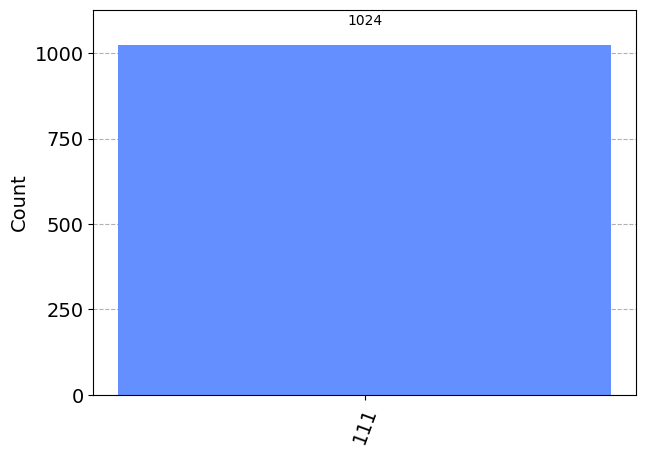

In [13]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Initialize the first two qubits (control qubits) to |1>
qc.x(0)  # Applying X gate to qubit 0
qc.x(1)  # Applying X gate to qubit 1

# Add a Toffoli gate
qc.ccx(0, 1, 2)  # The third qubit (qubit 2) is the target qubit

# Add measurements to see the final state
qc.measure_all()

# Visualize the circuit
print(qc.draw(output='text'))

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()

# Get and visualize the results
counts = result.get_counts(qc)
plot_histogram(counts)

Remember, while the Toffoli gate can mimic the AND operation in this specific setup, it is fundamentally different due to its quantum nature and the principles of superposition and entanglement it operates under as explained above.

For further information on this look at [*[Quantum Computing with Oracles]*](#quantum-computing-with-oracles) section of this jupyter notebook.

<a id="importance-of-quantum-algorithms"></a>
## **Importance of Quantum Algorithms**
Quantum algorithms are specialized procedures tailored for quantum computers, utilizing the unique principles of quantum mechanics to conduct computations. These algorithms have the potential to outperform classical algorithms significantly in solving certain types of problems.

One of the most groundbreaking examples is Shor's algorithm, developed by Peter W. Shor in 1994. This quantum algorithm revolutionized the field by demonstrating that it could factorize large numbers exponentially faster than the most efficient classical algorithms. This has profound implications, especially in the realm of cryptography, as it poses a threat to widely used encryption systems like RSA, which rely on the difficulty of factoring large numbers.

Another notable quantum algorithm is Grover's algorithm, proposed by Lov Grover in 1996. It offers a quadratic speedup for searching unsorted databases compared to the best possible classical algorithms. In practical terms, this means that a quantum computer using Grover's algorithm can find an item in a large database much faster than any classical computer.

For more information on a wider range of quantum algorithms, the Quantum Algorithm Zoo [*[1.3]*](#qaz) provides a comprehensive catalog.

<a id="overview-of-deutschs-algorithm"></a>
## **Intro to Deutsch's Algorithm**
For the purposes of this Jupyter Notebook however we are only interested in one such algorithm, The [*[Deutsch's Algorithm]*](#da). [*[1.4]*](#deutschs-algo)

Developed by David Deutsch in 1985, Deutsch's algorithm holds a special place in the history of quantum computing. It was the first quantum algorithm that demonstrated a clear advantage over classical computing methods. Deutsch's algorithm efficiently solves a specific type of problem known as the "black box problem." It determines whether a given function is constant (yielding the same output for all inputs) or balanced (producing 0 for half the inputs and 1 for the other half) by evaluating the function just once. In contrast, any classical algorithm would need to evaluate the function at least twice to determine the same results.

This algorithm not only showcased the potential of quantum computing to solve problems more efficiently than classical computing methods but also laid the groundwork for future developments in the field of Quantum Computing.

Before we can discuss the Deutsch's Algorithm and the Deutsch's problem, we first need to discuss Quantum Oracles and Black Boxes to better understand quantum computing and the Deutsch's Algorithm.

<a id="quantum-oracles"></a>
## **Quantum Oracles**

In the realm of quantum computing, an oracle is a fundamental concept that plays a pivotal role in many quantum algorithms. Think of a quantum oracle as a special kind of **'black box'** in your quantum circuit. You can input a quantum state into this box, and it performs a specific function on this state. However, the internal workings of this function are not visible to you.

The beauty of a quantum oracle is that it allows us to embed complex problems into quantum circuits, letting the quantum computer work with these problems in ways that are not possible in classical computing.

Quantum oracles are particularly significant in the study of algorithmic complexity and quantum computing (specifically the advantages quantum computing possess). They are used in many famous quantum algorithms, such as the Deutsch's algorithm, to illustrate how certain problems can be solved more efficiently on a quantum computer than on a classical computer.

<a id="quantum-oracle-ex"></a>
#### **Quantum Oracle Example**

Take the function f:{0,1} -> {0,1} which simply maps a single bit to another single bit. This is the same function that the Deutsch's algortithm revolves around. More on that later [*[Deutsch's Algorithm]*](#da) 

In a quantum circuit we can use this function as an oracle. Let's take a simple example where the function flips the input bit (a NOT operation). In quantum terms, this can be implemented using the Pauli-X gate. [*[1.5]*](#pauli-x)

In [14]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Add a Pauli-X gate as an oracle
qc.x(0)

# Visualize the circuit
qc.draw(output='text')

┌───┐
q: ┤ X ├
   └───┘

In the provided quantum example, I used a Pauli-X gate in a quantum circuit as an oracle to perform a NOT operation on a single qubit. 

In the example above I have used a Pauli-X gate in a quantum circuit as an oracle to perform a NOT operation on a single qubit. 

To compare this with classical computing and understand why quantum oracles in algorithms can offer advantages in computing, let's first consider how the equivalent operation would be done in a classical context and then explore the unique benefits of quantum oracles.

     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ X ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 


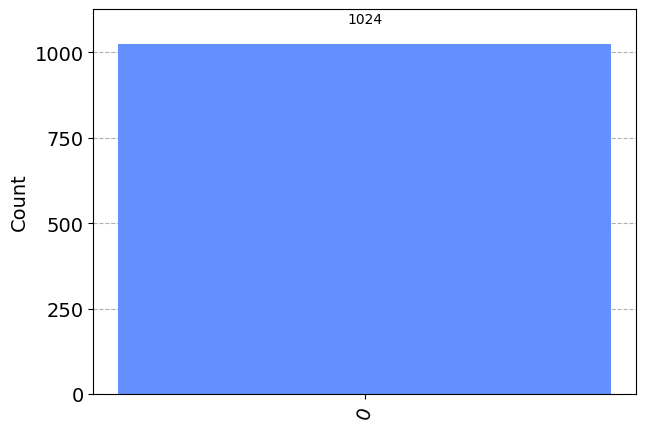

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate
qc.h(0)

# Insert the oracle (Pauli-X gate)
qc.x(0)

# Apply another Hadamard gate
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Draw the circuit
print(qc.draw(output='text'))

# Execute the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()

# Get the result
counts = result.get_counts(qc)
plot_histogram(counts)

In the above example, we apply a Hadamard gate before and after the oracle. This setup is a typical way to observe how the oracle (in this case, the X gate) affects the state of a qubit. The measurement results will show how the oracle alters the superposition created by the Hadamard gates.

<a id="classical-ex"></a>
#### **Classical Computing Example**

In classical computing, a NOT operation is straightforward. Given a bit (0 or 1), the NOT operation simply flips its state: 
0 becomes 1, and 1 becomes 0. This can be done using a simple logic gate in a digital circuit. However, classical bits can only exist in one of these two states at any given time.

In [16]:
# working of Not gate
 
def NOT(a):
    return not a
# Driver code
if __name__=='__main__':
    print(NOT(0))
 
    print("+---------------+----------------+")
    print(" | NOT Truth Table | Result |")
    print(" A = False | A NOT =",NOT(False)," | ")
    print(" A = True, | A NOT =",NOT(True)," | ")

True
+---------------+----------------+
 | NOT Truth Table | Result |
 A = False | A NOT = True  | 
 A = True, | A NOT = False  | 


<a id="quantum-w-oracles"></a>
## **Quantum Computing with Oracles**

We have now seen both a classical algorithmic operation and a quantum algorithmic operation in the example of NOT gates. 

The quantum oracle above, using the Pauli-X gate, performs a similar operation to that of the NOT gate for a classical computational operation, but does so on a qubit.

The critical difference is that a qubit can exist in a state of superposition [*[Key Features of Quantum Computing]*](#qkf)

To fully understand the advantages of quantum computing and importance of quantum oracles in algorithms allow me to go into more detail on some of the previous key features I mentioned:

<a id="qofeatures"></a>
#### **Key Features of Quantum Computing with Oracles**
1. **Superposition and Parallelism:** In a superposition state, a qubit can perform computations on multiple states (0 and 1) at the same time. When scaled up to multiple qubits, this allows quantum computers to perform a vast number of parallel computations with fewer operations compared to classical computers.
2. **Entanglement:** When qubits become entangled through quantum gates, the state of one qubit is directly related to the state of another. This creates correlations that can be exploited for more efficient problem-solving strategies than what's possible in classical computing.
3. **Quantum Interference:** Quantum algorithms use interference to amplify the probabilities of correct outcomes and diminish the probabilities of incorrect ones. This is not something that classical computing algorithms or processes are able to do.

Quantum oracles, by harnessing the quantum properties mentioned above, offer a unique approach to information processing that can be more efficient than classical methods, particularly for certain types of problems. Deutsch's algorithm serves as a prime example of this advantage as we will see later. [*[Deutsch's Algorithm]*](#da)

While a quantum oracle performing a NOT operation (like the Pauli-X gate) might seem similar to a classical NOT operation at first, the ability of quantum systems to utilize superposition, entanglement, and interference enables a fundamentally different and more powerful approach to computation.

<a id="The Black Box"></a>
## **The Black Box**

Now that we understand Oracles we can discuss Black Boxes and more importantly, the Black Box problem. 

As I mentioned previously the internal workings of a function are not known to a user in quantum computing. Only the inputs and the outputs are visible. This concept in quantum computing is referred to as the Black Box for that very reason.

<a id="KeyFeaturesofaBlackBox"></a>
#### **Key Features of a Black Box**

1. **Encapsulation of a Function:** The black box encapsulates a specific function. In the case of quantum computing, this function typically involves operations on qubits.
2. **Unknown Mechanism:** The logic of how the function processes the inputs to generate the outputs is hidden.
3. **Use in Quantum Algorithms:** Quantum black boxes (oracles) are used in various quantum algorithms. For example, in Deutsch's algorithm, the oracle holds a function that is either constant (the same output for all inputs) or balanced (outputs 0 for half the inputs and 1 for the other half), and the algorithm's goal is to determine which type the function is. More on this here [*[Deutsch's Algorithm]*](#da)
4. **Interaction through Inputs and Outputs:** You interact with the black box solely by providing inputs and observing outputs. In quantum algorithms, these inputs and outputs are states of qubits.

Quantum black boxes or oracles are important because they offer a way to compare the efficiency of quantum and classical computational processes. They help in demonstrating quantum advantages where a quantum algorithm can solve a problem more efficiently than any classical algorithm. For instance, quantum algorithms like [*[Deutsch's Algorithm]*](#da) use oracles to achieve tasks faster than classical algorithms, showcasing the potential power of quantum computing.

In summary, in quantum computing, a black box is an abstract concept used primarily in algorithm design to represent a function whose internal workings are hidden. This concept is pivotal in illustrating the unique capabilities and advantages of quantum algorithms over classical computing approaches.

<a id="BlackBoxvsOracles"></a>
#### **Black Box vs Oracles**

To put it simply, All Oracles are a type of Black Box but not all Black Boxes are Oracles. [*[1.8]*](#guideqoracles)

In quantum computing, a black box generally refers to any function whose internal workings are unknown or hidden from the user (as mentioned previously). An oracle on the other hand is a specific type of black box used in quantum algorithms. It's a well defined unitary operation that performs a certain function on qubits, but its internal mechanism is not accessible or visible to the user. 



<a id="TheBlackBoxProblem"></a>
## **The Black Box Problem** 

Knowing what we know about oracles and black boxes, we can now discuss the black box problem.

A black box problem is one where the internal mechanism or the logic of the problem is unknown or hidden. The only information available to an algorithm trying to solve this problem is based on input-output relationships. You can think of it as a mysterious box where you can input certain values and observe the output, but you have no knowledge of what happens inside the box that leads to these outputs.

This type of problem is a standard way to represent various challenges in both classical and quantum algorithm theory. It offers an abstract yet powerful way to explore and analyze the capabilities and limitations of different computational models.

<a id="BlackBoxRelevance"></a>
#### **Black Box Relevance**

The black box model takes on a new dimension in quantum computing, which approaches problem solving in a different way than classical computing.

- **Quantum Superposition and Parallelism:** Quantum computing can use superposition. As we know this is where a qubit can exist in multiple states simultaneously. This allows a quantum algorithm to process a range of input possibilities at once, rather than one at a time as in classical computing. In the context of a black box problem, this means a quantum computer can evaluate the black box for multiple inputs at the same time.

- **Quantum Oracles:** In quantum algorithms, a black box is often represented as a quantum oracle (as we know from earlier). This oracle encodes the problem's unknown function and is designed to work with qubits in superposition. When used in an algorithm, such as [*[Deutsch's Algorithm]*](#da), the quantum oracle can provide insights into the function's properties with fewer evaluations than would be required in classical computing.

- **Efficiency in Problem Solving:** Quantum algorithms, using these principles, can sometimes solve black box problems more efficiently than classical algorithms. [*[Deutsch's Algorithm]*](#da) is a primary example where a quantum approach determines the nature of the black box function (whether it's constant or balanced) with a single evaluation, something impossible in a classical context.

While classical computers deal with black box problems in a sequential and liner order, quantum computers tackle these problems with an integrated approach, utilizing superposition and quantum interference. This difference highlights the potential for quantum computing to solve problems more efficiently than classical computational methods.


<a id="da"></a>
## **The Deutsch's Algorithm**

Deutsch's algorithm addresses a fundamental problem in quantum computing, often referred to as the Deutsch problem. [*[1.7]*](#introqc)

This problem revolves around a specific type of function: f:{0,1} -> {0,1} 

The function takes a single bit as input and returns a single bit as output. However, the function's operation is hidden within a quantum oracle, a black box, that performs an operation without revealing its inner workings. The objective is to determine the nature of this function. As we know from earlier this is to determine whether the given function is constant or balanced.

- **Constant:** The function returns the same output (either 0 or 1) for both inputs (0 and 1).
- **Balanced:** The function returns opposite outputs for inputs 0 and 1.

<a id="caqa"></a>
#### **Classical Approach vs Quantum Approach**

As we now know, in classical computation, determining the outcome of this function would require two queries, one for each input. However with Deutsch's Algorithm and the use of quantum computing, the function can be solved with a single query. 

<a id="dao"></a>
## **Deutsch's Algorithm Overview**

The Desutsch's algorithm uses unique quantum mechanical features, the same features mentioned in previously (superposition, entanglement and interference). In conjunction with these features the Deutsch's algorithm uses a quantum oracle in order to be able to execute the function in a single query. The step the Deutsch's algorithm takes to do this is as follows: 

1. **Initialization:** Two qubits are prepared, the first in state ∣0⟩ and the second in state ∣1⟩.
2. **Superposition:** A Hadamard gate is applied to both qubits, creating a superposition of states.
3. **Oracle Application:** The quantum oracle encoding the function f is applied to the qubits.
4. **Interference:** Another Hadamard gate is applied to the first qubit, generating quantum interference.
5. **Measurement:** The first qubit is measured. A result of 0 indicates that f is constant, while 1 indicates that f is balanced.

<a id="das"></a>
## **Deutsch's Algorithm Simulation**

The following code cells are used to create and simulate the Desutsch's Algorithm using Qiskit. The code is structured so that users can easily choose between a constant or balanced oracle. Each part of the code is accompanied by comments and explanations to clarify the process.

<a id="daiq"></a>
#### **Deutsch's Algorithm in Qiskit**

Two functions, balanced_oracle and constant_oracle, are defined below. 

The balanced_oracle applies a CNOT gate (Controlled-NOT), creating a scenario where the output changes based on the input. The constant_oracle performs no operation, representing a function that always outputs the same value. [*[1.7]*](#introqc)

In [17]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import pylatexenc

# Define the balanced oracle function
def balanced_oracle(qc):
    qc.cx(0, 1)  # Apply CNOT gate as a balanced oracle
    return qc

# Define the constant oracle function
def constant_oracle(qc):
    # No operation is performed for a constant oracle
    # Optional: Apply an identity gate or other operation that does not change the state
    return qc

The function deutsch_algorithm sets up the quantum circuit for the algorithm. It initializes two qubits, applies Hadamard gates to create superposition states, inserts the chosen oracle (either constant or balanced), applies another Hadamard gate to the first qubit, and finally measures this qubit.

- **Quantum Circuit:** This line creates a new quantum circuit with two qubits and one classical bit. The two qubits will be used for the algorithm, and the classical bit is for measurement.
- **Hadamard Gate:** The Hadamard (h) gate is a fundamental quantum gate that creates a superposition state from a basis state. When applied to a qubit initially in the ∣0⟩ state, it transforms it into an equal superposition of ∣0⟩ and ∣1⟩, meaning the qubit is in both states simultaneously.
    - Applying it to the first qubit here is crucial for setting up the superposition necessary for the quantum parallelism exploited in Deutsch's algorithm.

- **Pauli-X Gate:** qc.x(1) applies the Pauli-X (or NOT) gate to the second qubit. This gate flips the qubit from the ∣0⟩ state to the ∣1⟩ state.
- **Hadamard Gate Again:** qc.h(1) then applies the Hadamard gate to this second qubit. After these two operations, the second qubit is transformed from ∣0⟩ to a superposition that is a negative phase version of the first qubit, often referred to as ∣−⟩.
    - This preparation is important for the working of the Deutsch's algorithm, as it sets the stage for the quantum interference needed later.

- **Oracle Function:** qc = balanced_oracle(qc) or qc = constanct_oracle(qc) These lines integrate the oracle selected into the quantum circuit. The oracle is a critical component of Deutsch's algorithm, determining the nature of the function (balanced or constant) that we're testing.

- **Second Hadamard Gate on First Qubit:** The Hadamard gate is applied again to the first qubit. This step is where quantum interference comes into play. The interference pattern that results is key to Deutsch's algorithm, as it leads to a measurable difference in the final state of the first qubit depending on whether the oracle's function is constant or balanced.
- **Measurement:** Finally, the first qubit is measured, and its value is stored in the classical bit. The result of this measurement (0 or 1) reveals whether the function encoded by the oracle is constant or balanced.

In [18]:
# Implement Deutsch's algorithm
def deutsch_algorithm(oracle_type='balanced'):
    """Implement Deutsch's algorithm with the chosen oracle type."""
    qc = QuantumCircuit(2, 1)
    
    # Apply Hadamard gates to both qubits to prepare them in superposition states
    qc.h(0)  # Hadamard on qubit 0
    qc.x(1)  # Pauli-X on qubit 1 to prepare it in the |1> state
    qc.h(1)  # Hadamard on qubit 1 to put it into superposition
    
    # Insert the chosen oracle
    if oracle_type == 'balanced':
        qc = balanced_oracle(qc)
    else:
        qc = constant_oracle(qc)
    
    # Apply a Hadamard gate to the first qubit after the oracle operation
    qc.h(0)
    
    # Measure the first qubit and store the result in the classical bit
    qc.measure(0, 0)
    
    return qc

In the cell below, you can change the oracle type to either balanced or constant to change the output.

In [19]:
# Choose the type of oracle: 'balanced' or 'constant'
oracle_type = 'balanced'  # Change to either 'balanced' or 'constant' to see the different circuits and results

# Create the circuit with the chosen oracle
qc = deutsch_algorithm(oracle_type)

This cells below execute the the circuit and displays both the circuit and the results.

C:\Users\New user\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


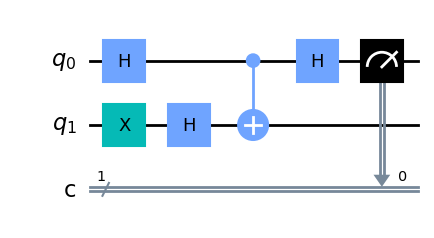

In [20]:
# Draw and display the circuit
qc.draw(output='mpl')

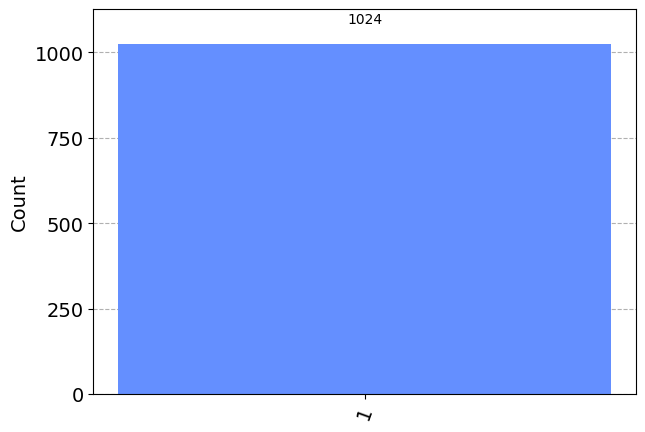

In [21]:
qc = deutsch_algorithm(oracle_type)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

<a id="ibmq"></a>
## **Deutsch's Algorithm - IBM Quantum Platform**

Below, I have demonstrated how to use Qiskit to run the Deutsch's Algorithm on an IBM Quantum Computer.

#### **IBM Quantum Computer - Deutsch's Algorithm**
The following is a guide and explanation of the code below on how you can setup and access an IBM quantum computer to run the previously simulated Deutsch's Algorithm on an IBM Quantum Computer and get real results (outputs) back.

1. **Setting Up Access to IBM Quantum Computers:** First, we import IBMQ from Qiskit and save our account using the provided API token. This token is like a password that lets us access IBM's quantum computers. After saving, we load our account, which tells Qiskit to use this account for the following operations. To run this yourself, follow the documentation here [Setup an IBM Quantum Channel](https://docs.quantum.ibm.com/start/setup-channel#ibm-quantum-platform)
2.  **Selecting a Quantum Device:** We obtain a 'provider' from IBMQ, which can be thought of as a gateway to IBM's quantum devices.
    - Then we ask for a list of available quantum devices (backends) that have at least 2 qubits, are not simulators, and are currently operational. We pick the least busy one so we can run our experiment faster.
3. **Building and Running the Quantum Circuit:** We define our quantum circuit using the previously created Deutsch's Algorithm and more particularly the deutsch_algorithm function.
    - We execute this circuit on the chosen quantum device. The execute function sends our circuit to IBM's quantum computer and waits for it to run. We run the experiment 1024 times to get a good statistical result.
4. **Retrieving and Displaying Results:** After the job is done, we ask for the results. counts tells us how many times each possible outcome was measured. We plot these counts as a histogram. The histogram shows two bars, each representing the frequency of the quantum computer's output state being '0' or '1'. Here, the bar for '1' is much higher, indicating that this outcome occurred more frequently, which is characteristic of a balanced oracle in Deutsch's algorithm. This is correct as our `oracle_type = 'balanced'` from earlier is set so. You can see this in the histogram below.
    - Lastly, we draw our quantum circuit. This diagram helps us visualize the sequence of quantum operations performed.

configrc.store_credentials:WARNING:2023-12-22 13:41:12,268: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-12-22 13:41:12,739: Credentials are already in use. The existing account in the session will be replaced.


The least busy device: ibm_osaka
Job Status: job has successfully run
{'0': 54, '1': 970}


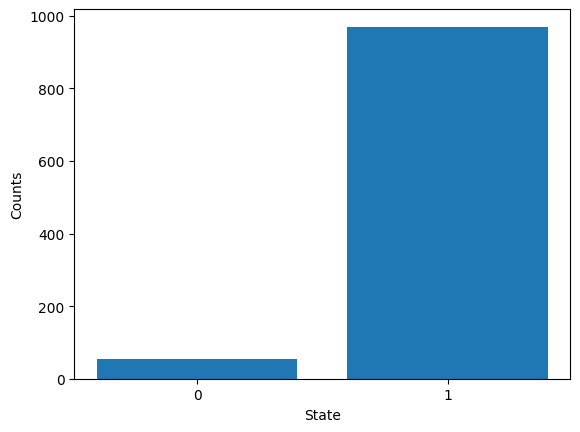

C:\Users\New user\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


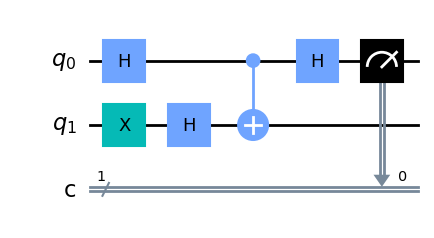

In [22]:
from qiskit import *
from qiskit.providers.ibmq import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
api_token = '53aa22ebbc306a6a040fe9eeca5719996913a299e35d0f6a0fa159223bd53ead2bd5c8e8d932e2c54a22b367714046ccf81c5d69256a37178f6fb5aabe6e4c5f'

# Save your account
IBMQ.save_account(api_token)
# Load your saved IBM Quantum account
IBMQ.load_account()

# Get the provider for IBM Quantum devices
provider = IBMQ.get_provider(hub='ibm-q') #2 start

# Choose an actual quantum device that is least busy
from qiskit.providers.ibmq import least_busy
available_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True)
backend = least_busy(available_devices) #2 end
print(f"The least busy device: {backend}")

# Define the circuit using your existing deutsch_algorithm function
oracle_type = 'balanced'  # or 'constant', based on your requirement
qc = deutsch_algorithm(oracle_type)

# Execute the quantum circuit on the chosen quantum device
job = execute(qc, backend=backend, shots=1024)

# Monitor the job's progress
job_monitor(job)

# Once the job is done, retrieve and display the results
result = job.result()
counts = result.get_counts(qc)

# Print the counts
print(counts)

# Plot the histogram using Qiskit's built-in function
plot_histogram(counts)

# Alternative plotting using Matplotlib
plt.bar(counts.keys(), counts.values())
plt.xlabel('State')
plt.ylabel('Counts')
plt.show()

# Draw and display the executed circuit
qc.draw(output='mpl')

<a id="refcc"></a>
## **References**

<a id="cc"></a>
*[11.0]*  - TechTarget Contributor. "Classical Computing". TechTarget, November 2018. 

https://www.techtarget.com/whatis/definition/classical-computing#:~:text=Classical%20computing%20is%20another%20name,or%20a%201%20(on)

---

<a id="qc"></a>
*[1.1]*  - Gillis, Alexander S. "Quantum Computing". TechTarget, January 2023. 

https://www.techtarget.com/whatis/definition/quantum-computing

---

<a id="toffoli"></a>
*[1.2]* - S.G. Roy, A. Chakrabarti. "Quantum Inspired Computational Intelligence". Science Direct, 2017 

https://pennylane.ai/qml/glossary/what-is-a-toffoli-gate/

---

<a id="qaz"></a>
*[1.3]* - Jordan, Stephen.  "Algebraic and Number Theoretic Algorithms". Quantum Algorithm Zoo, June 2022

https://quantumalgorithmzoo.org/

---

<a id="deutschs-algo"></a>
*[1.4]* - Gharibian, Sevag. "Lecture 6: Deutsch's Algorithm". Introduction to Quantum Computation, Virginia Commonwealth University, 2015.

https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch's%20algorithm.pdf

---

<a id="pauli-x"></a>
*[1.5]* - IBM Quantum Learning. "Explore gates and circuits with the Quantum Composer". 

https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer

---

<a id="qcqi"></a>
*[1.6]* - Nielsen, Michael A; Chuang Isaac L. "Quantum Computation and Quantum Information", Cambridge University Press, 2010

https://profmcruz.files.wordpress.com/2017/08/quantum-computation-and-quantum-information-nielsen-chuang.pdf

---

<a id="introqc"></a>
*[1.7]* - Kaye, Philip; Laflamme, Raymond; Mosca, Michele; "An introduction to Quantum Computing", Oxford University Press, 2007

http://ursula.chem.yale.edu/~batista/classes/v572/Mosca.pdf

---

<a id="guideqoracles"></a>
*[1.8]* - Javier Sanchez-Rivero, Daniel Talaván, Jose Garcia-Alonso, Antonio Ruiz-Cortés, Juan Manuel Murillo; "Some Initial Guidelines for Building Reusable Quantum", March 2023

https://arxiv.org/pdf/2303.14959.pdf#:~:text=An%20oracle%20can%20be%20thought,the%20algorithm%20that%20uses%20it.

---

